# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [144]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [145]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

## 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [146]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [147]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

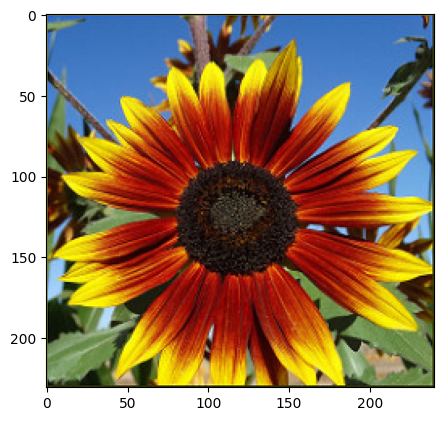

In [148]:
plt.figure(figsize=[5, 5])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [149]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

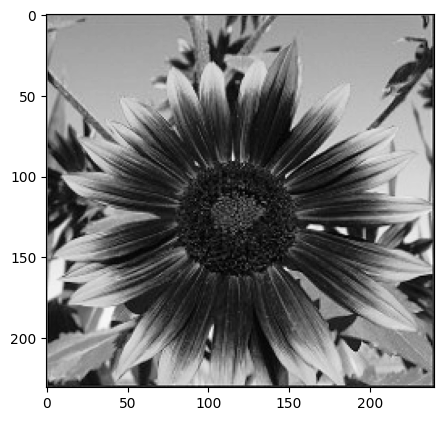

In [150]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [151]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

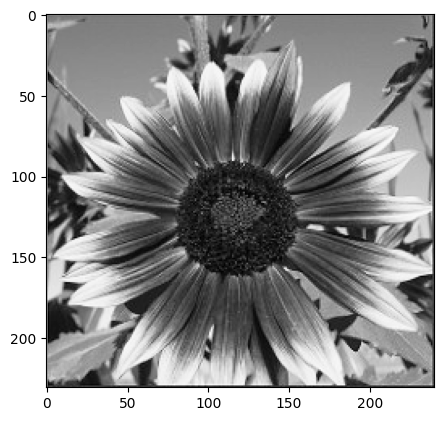

In [152]:
plt.figure(figsize=[5, 5])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [153]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [154]:
def convert_rgb_to_grayscale(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=[5, 5])
    plt.imshow(img_gray, cmap='Greys_r')
    return img_gray

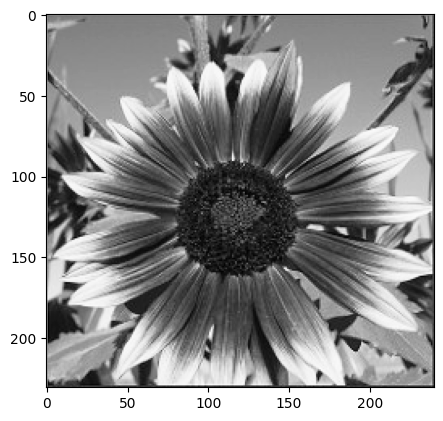

In [155]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:**
Простое среднее арифметическое не учитывает вклад каждого цветового канала (красного, зеленого и синего) в яркость пикселя. В результате, при его использовании, изображение в оттенках серого может выглядеть менее выразительным и плоским. Взвешенное среднее учитывает этот вклад, сохраняя часть цветовой информации и делая изображение более качественным.

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB $\to$ HSV

In [156]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

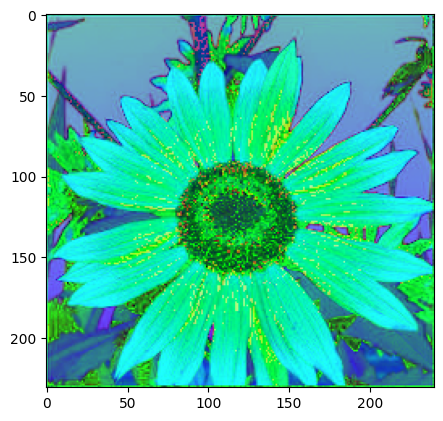

In [157]:
plt.figure(figsize=[5, 5])
plt.imshow(img_hsv)

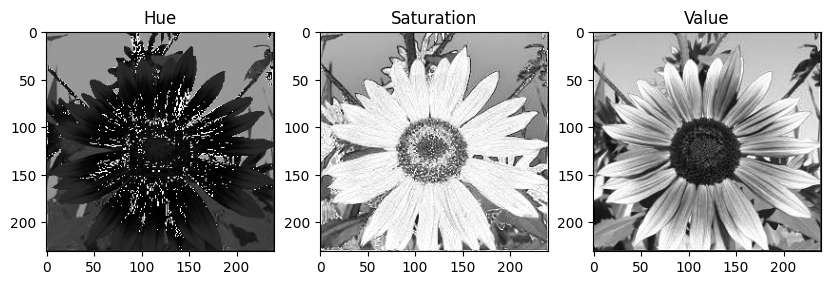

In [158]:
# Split the image into color channels
h, s, v = cv2.split(img_hsv)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(h, cmap="gray")
plt.title('Hue')

plt.subplot(132)
plt.imshow(s, cmap="gray")
plt.title('Saturation')

plt.subplot(133)
plt.imshow(v, cmap="gray")
plt.title('Value')

# Display the plot
plt.show()


## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

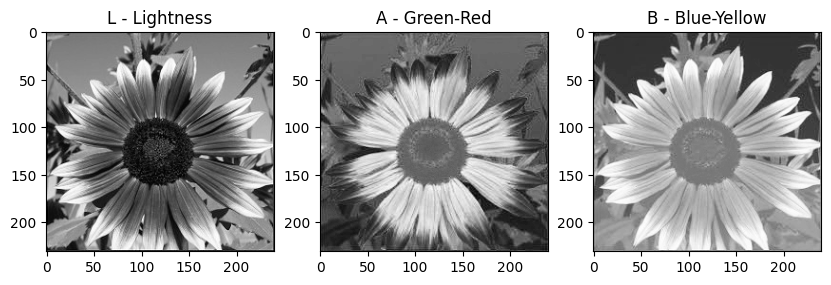

In [159]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(img_lab)

plt.figure(figsize=[10, 30])
plt.subplot(131)
plt.imshow(l, cmap="gray")
plt.title('L - Lightness')

plt.subplot(132)
plt.imshow(a, cmap="gray")
plt.title('A - Green-Red')

plt.subplot(133)
plt.imshow(b, cmap="gray")
plt.title('B - Blue-Yellow')

plt.show()

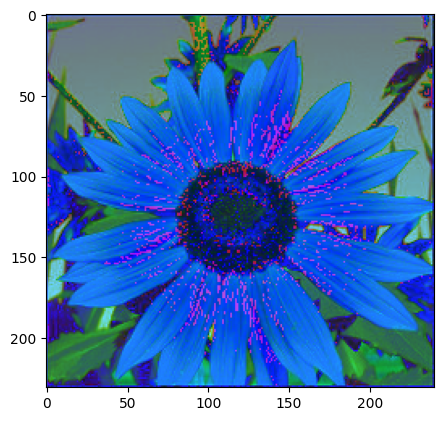

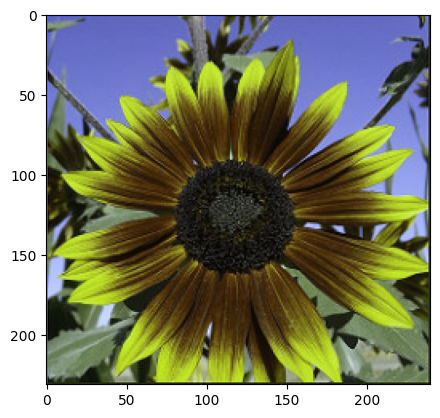

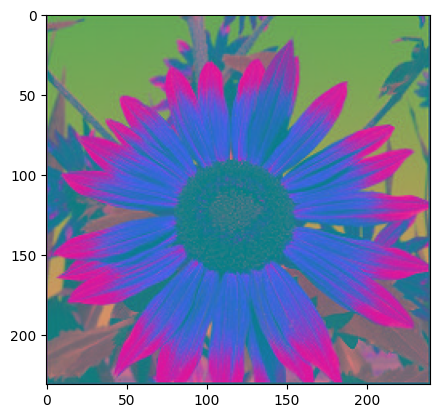

In [160]:
#Еще несколько цветовых пространств
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
img_xyz = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
plt.figure(figsize=[5, 5])
plt.imshow(img_hls)
plt.show()
plt.imshow(img_xyz)
plt.show()
plt.imshow(img_yuv)
plt.show()

## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**
Переход из RGB в другое цветовое пространство полезен в следующих задачах:

1. Улучшение качества изображения: некоторые цветовые пространства лучше подходят для определенных типов изображений. Например, LAB хорошо подходит для работы с оттенками кожи, а YUV - для обработки видео.

2. Удаление шума: некоторые цветовые пространства позволяют более эффективно удалять шум. Например, YCbCr хорошо подходит для удаления шума в видео.

3. Изменение цветовой гаммы: некоторые цветовые пространства позволяют более гибко изменять цветовую гамму изображения. Например, HSV хорошо подходит для изменения насыщенности и яркости.

4. Сжатие изображений: некоторые цветовые пространства позволяют более эффективно сжимать изображения без потери качества. Например, JPEG использует YCbCr для сжатия изображений.

5. Анализ изображений: некоторые цветовые пространства позволяют более эффективно анализировать изображения. Например, HSV хорошо подходит для анализа цветовых областей.

6. Цветокоррекция: некоторые цветовые пространства позволяют более гибко корректировать цвета. Например, LAB хорошо подходит для коррекции баланса белого.

7. Обработка изображений в режиме реального времени: некоторые цветовые пространства позволяют более эффективно обрабатывать изображения в режиме реального времени. Например, YUV хорошо подходит для обработки видео в режиме реального времени.

Таким образом, переход из RGB в другое цветовое пространство может быть полезным в различных задачах обработки изображений, в зависимости от конкретных требований.

## Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [161]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [162]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [163]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

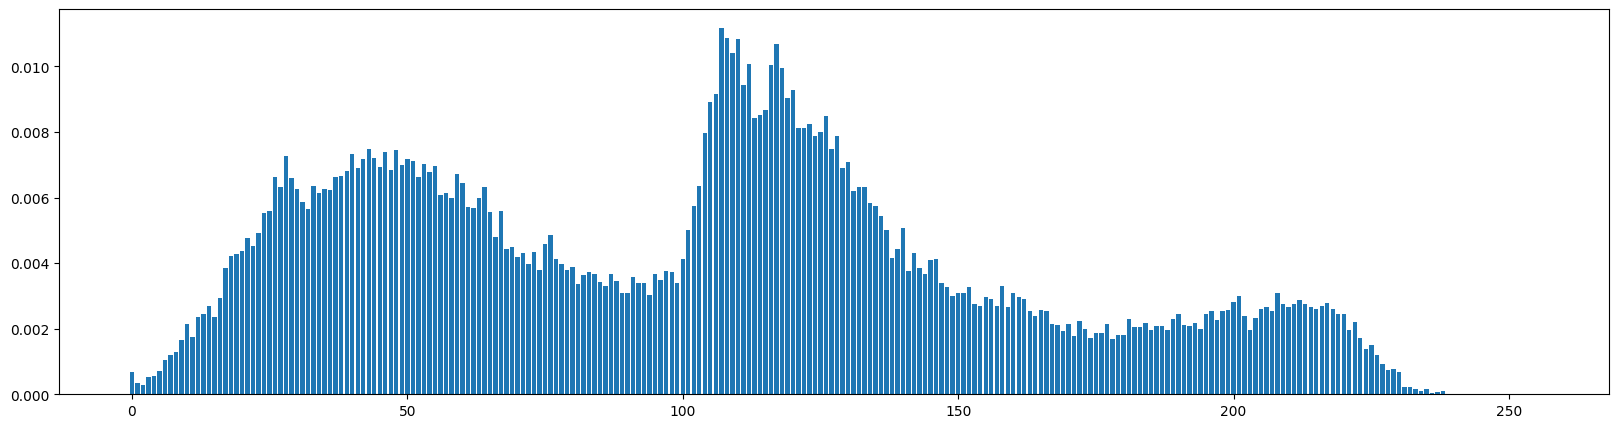

In [164]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [165]:
def compute_hist(img):
    hist = cv2.calcHist([img],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений
    return hist

In [166]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [167]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

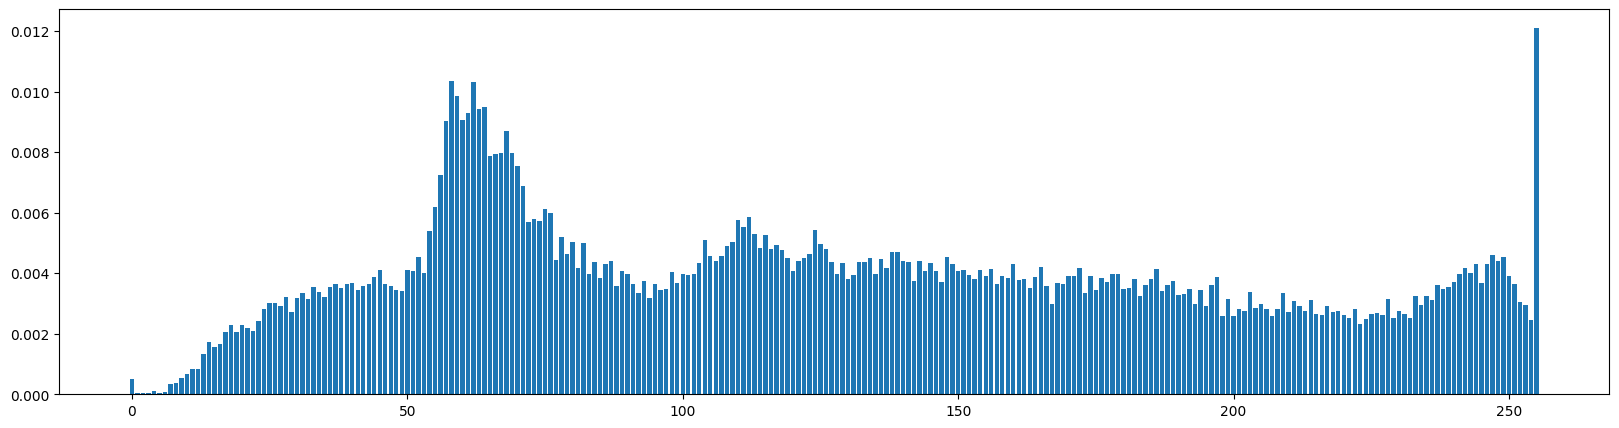

In [168]:
visualize_hist(hist_r)

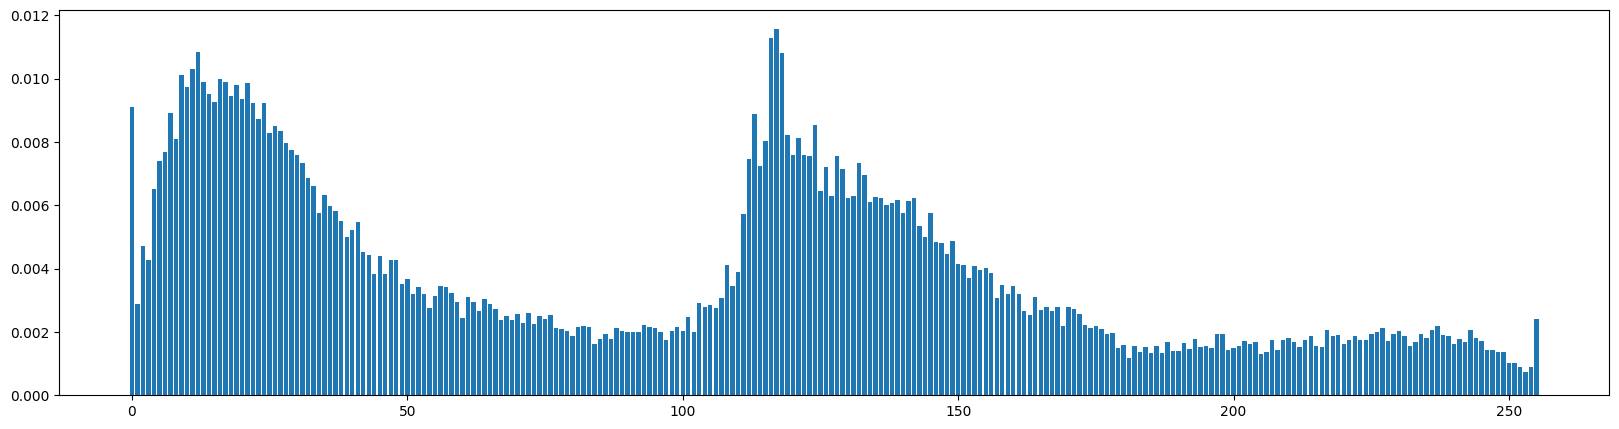

In [169]:
visualize_hist(hist_g)

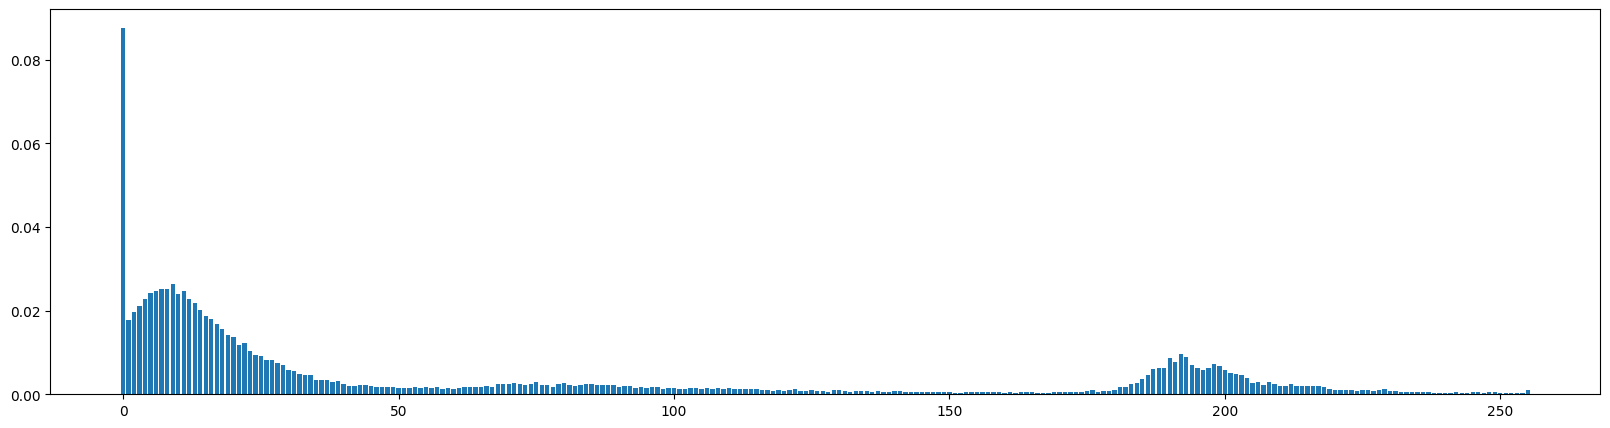

In [170]:
visualize_hist(hist_b)

In [171]:
assert((hist_gray == hist_cv).all())

## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ:**
Гистограмма изображения показывает распределение интенсивности пикселей по всем каналам цвета (в случае RGB) или яркости (в случае градаций серого). На гистограмме можно увидеть, какие уровни яркости или цвета наиболее часто встречаются в изображении. Это позволяет делать выводы о яркости, контрасте и цветовой гамме изображения. Например, если гистограмма сосредоточена близко к одному концу диапазона, изображение может быть пересвеченным или недосвеченным. Если она более равномерно распределена, изображение более контрастное.

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ:**
При изменении кадра во времени, гистограмма может изменяться в зависимости от содержания кадра. Например, если сцена резко меняется, переходит с яркого дневного света на темное помещение, то гистограмма будет меняться, поскольку изменится распределение интенсивности пикселей.

Однако если сцена остается примерно похожей, например, стабильный вид на природу, где основные цвета и яркость остаются примерно постоянными, то и гистограмма будет меняться не так сильно. Если изменения в содержании сцены незначительны, то и изменения в гистограмме будут незначительными.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

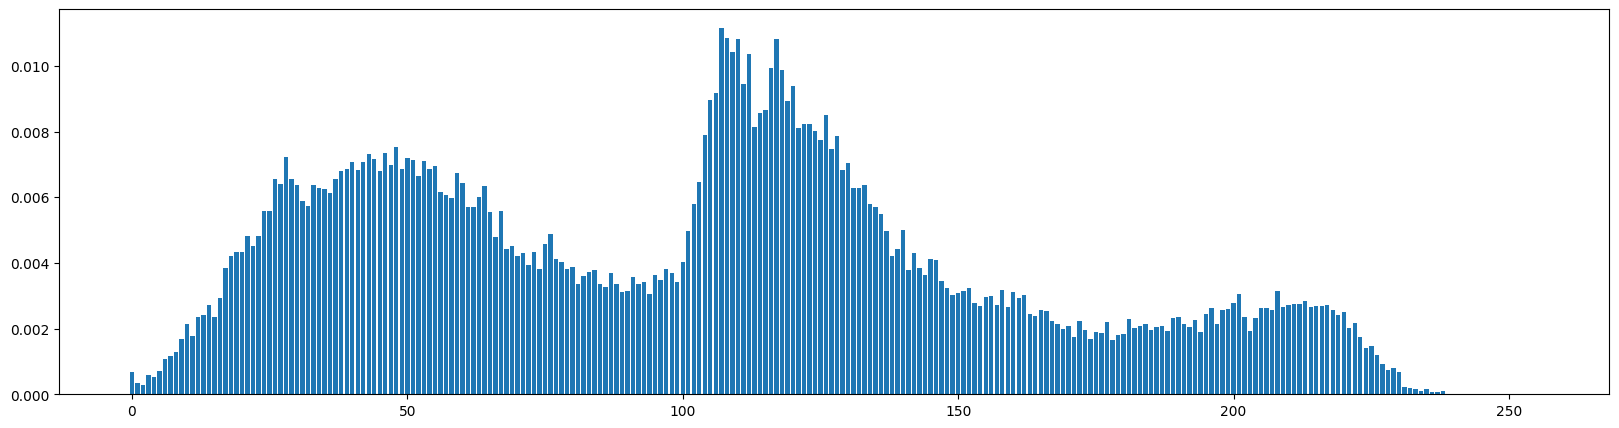

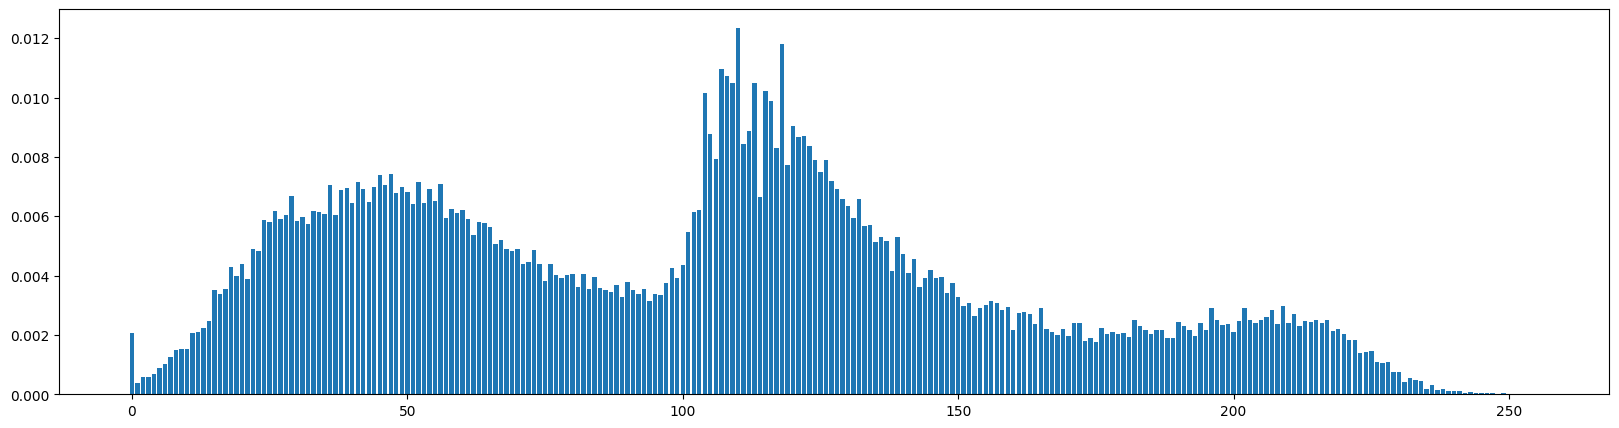

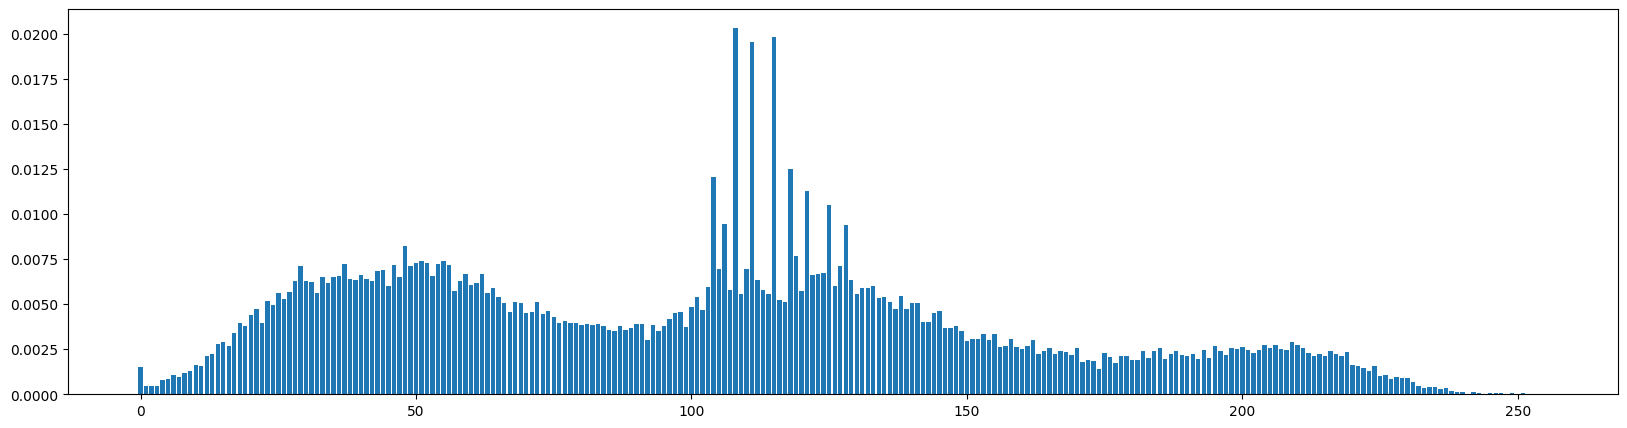

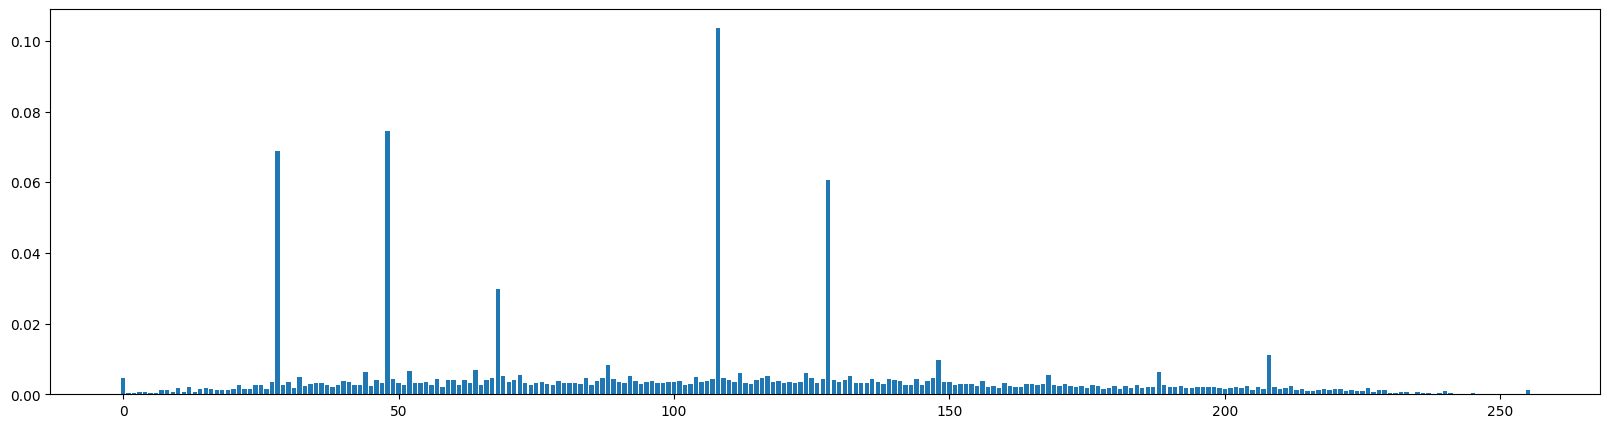

In [172]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

# Сжатие и сохранение изображения
cv2.imwrite('img_gray_90.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 90])
cv2.imwrite('img_gray_60.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 60])
cv2.imwrite('img_gray_30.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 30])
cv2.imwrite('img_gray_5.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, 5])

img_gray_90 = cv2.imread('img_gray_90.jpg', cv2.IMREAD_GRAYSCALE)
img_gray_60 = cv2.imread('img_gray_60.jpg', cv2.IMREAD_GRAYSCALE)
img_gray_30 = cv2.imread('img_gray_30.jpg', cv2.IMREAD_GRAYSCALE)
img_gray_5 = cv2.imread('img_gray_5.jpg', cv2.IMREAD_GRAYSCALE)

# гистограммы
hist_gray_90 = compute_hist(img_gray_90)
hist_gray_60 = compute_hist(img_gray_60)
hist_gray_30 = compute_hist(img_gray_30)
hist_gray_5 = compute_hist(img_gray_5)

# Визуализация
visualize_hist(hist_gray_90)
visualize_hist(hist_gray_60)
visualize_hist(hist_gray_30)
visualize_hist(hist_gray_5)

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

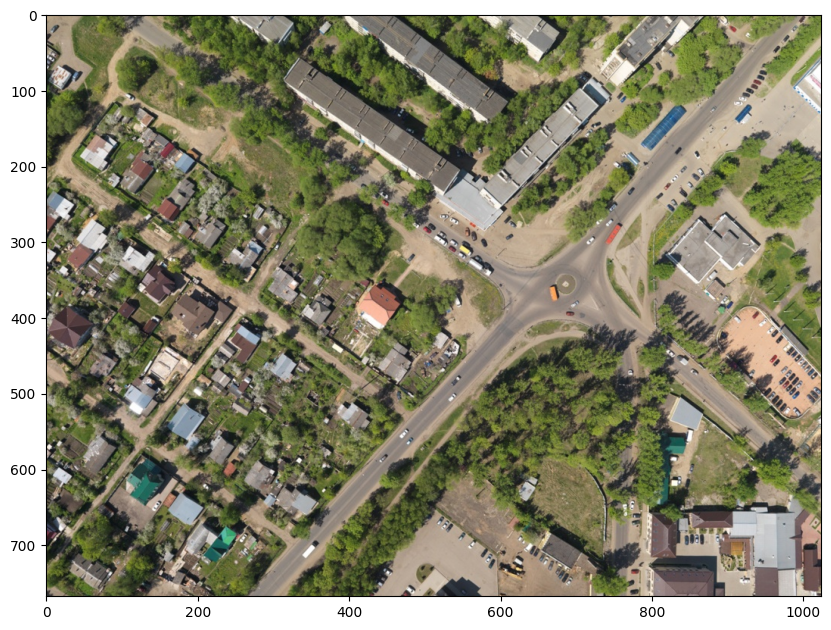

In [173]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image)

Доля зеленая: 0.37


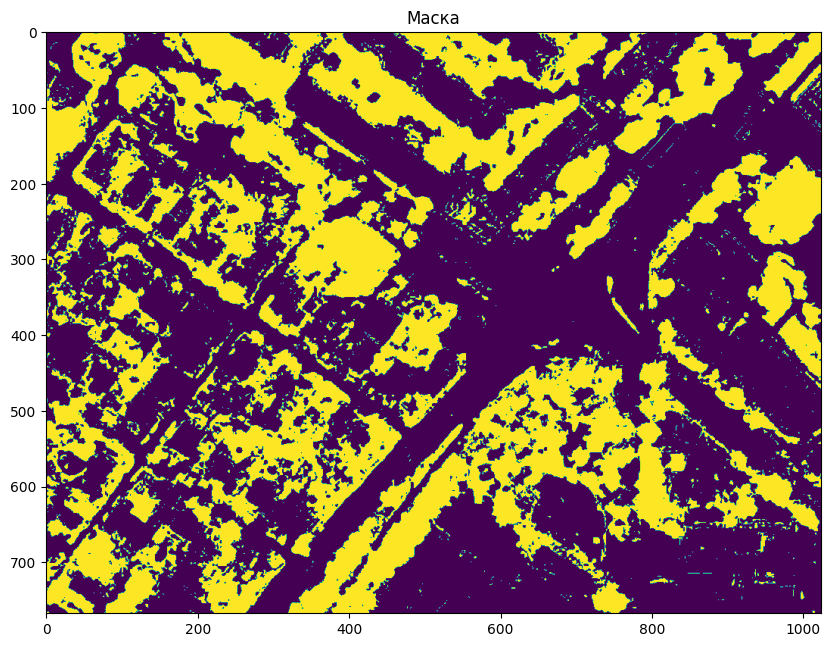

In [174]:
aerial_image_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)

# Рассчет гистограммы
hist_hue = compute_hist(aerial_image_hsv[:, :, 0])

green = [30, 90]  # Примерное значение порога в градусах (в диапазоне от 0 до 179)

mask = ((aerial_image_hsv[:, :, 0] > green[0]) & (aerial_image_hsv[:, :, 0] < green[1])).astype(np.uint8)


# Рассчет доли изображения, занимаемой зелеными насаждениями
zelen = mask.sum() / mask.size

# Визуализация бинарной маски
plt.figure(figsize=[10, 10])
plt.imshow(mask)
plt.title('Маска')

# Вывод доли изображения, занимаемой зелеными насаждениями
print(f'Доля зеленая: {zelen:.2f}')

# Упражнение 6: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [175]:
class IntegralImage:

    def __init__(self, img):
        assert(len(img.shape) == 2)  # только для серых изображений

        self.img = img


        self.integral_img = np.zeros_like(img, dtype=np.float64)
        self.integral_img[0, 0] = img[0, 0]

        for i in range(1, img.shape[0]):
            self.integral_img[i, 0] = self.integral_img[i - 1, 0] + img[i, 0]

        for j in range(1, img.shape[1]):
            self.integral_img[0, j] = self.integral_img[0, j - 1] + img[0, j]

        for i in range(1, img.shape[0]):
            for j in range(1, img.shape[1]):
                self.integral_img[i, j] = self.integral_img[i - 1, j] + self.integral_img[i, j - 1] - self.integral_img[i - 1, j - 1] + img[i, j]


    def sum(self, x, y, w, h):


        # Вычисление суммы значений в прямоугольной области
        if x == 0 and y == 0:
            return self.integral_img[y + h - 1, x + w - 1]
        elif x == 0:
            return self.integral_img[y + h - 1, x + w - 1] - self.integral_img[y - 1, x + w - 1]
        elif y == 0:
            return self.integral_img[y + h - 1, x + w - 1] - self.integral_img[y + h - 1, x - 1]
        else:
            return self.integral_img[y + h - 1, x + w - 1] - self.integral_img[y - 1, x + w - 1] - self.integral_img[y + h - 1, x - 1] + self.integral_img[y - 1, x - 1]


In [176]:
I = IntegralImage(img_gray)

In [177]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**
Использование интегрального изображения может быть полезно во многих задачах обработки изображений.

Например, при поиске объектов на изображении или выделении объектов, интегральное изображение может использоваться для быстрого вычисления суммы интенсивностей пикселей в заданной области.
Также интегральное изображение может быть полезно при фильтрации изображений или обработке изображений в реальном времени. В этих случаях быстрое вычисление суммы интенсивностей пикселей в заданной области может существенно ускорить обработку изображений.

Таким образом, интегральное изображение может быть полезным во многих задачах обработки изображений, где требуется быстрое вычисление определенных характеристик изображения.

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**
В программировании для расчета интегрального изображения используется метод динамического программирования. При использовании этого метода происходит вычисление значений подзадач и сохранение их для последующего использования. Таким образом, при вычислении интегрального изображения для каждого пикселя происходит накопление значений от предыдущих пикселей, что позволяет быстро вычислять суммы интенсивностей в прямоугольных областях.